# `20210424a`

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import butter, lfilter,hilbert

%load_ext autoreload
%autoreload 2

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
filz= np.load("data.npz") 
arrs= []
for i in filz:

    series = []
    for j in range(len(filz[i])):
        #print(j)
        signal = filz[i][j] 
        x = butter_bandpass_filter(signal, 2, 8, 64, order=6)
        #interet = np.abs(hilbert(x[175:1900][10:500]))
        series.append(x)
        
    arrs.append(series)
        
A = arrs[0]
B = arrs[1]
C = arrs[2]


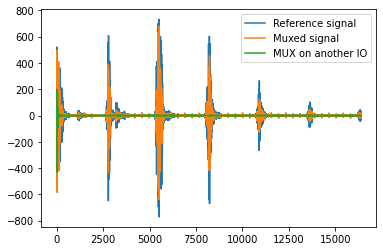

In [3]:
plt.plot(B[0],label="Reference signal")
plt.plot(A[0],label="Muxed signal")
plt.plot(C[0],label="MUX on another IO")
plt.legend()

In [4]:
len(arrs[0])

32

In [5]:
cln = []
for k in arrs:
    signal = np.empty((len(k[0])*2,),
                    dtype=k[0].dtype)
    # Compute even and odd datas.
    signal[0::2] = np.sum(k[1::2], axis=0)/(16.0)
    signal[1::2] = np.sum(k[::2], axis=0)/(16.0)
    cln.append(signal)
A = cln[0]
B = cln[1]
C = cln[2]

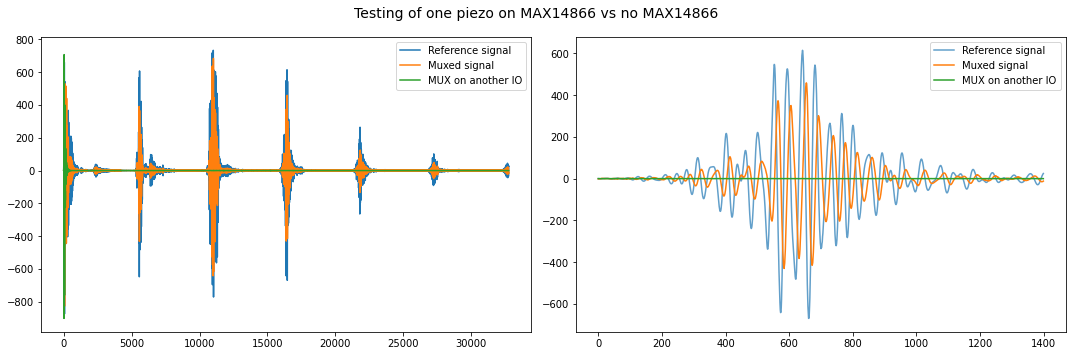

In [7]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot(B,label="Reference signal")
axes[0].plot(A,label="Muxed signal")
axes[0].plot(C,label="MUX on another IO")
axes[0].legend()

axes[1].plot(B[15800:17200],label="Reference signal",alpha=0.7)
axes[1].plot(A[15800:17200],label="Muxed signal")
axes[1].plot(C[15800:17200],label="MUX on another IO")
axes[1].legend()

plt.suptitle("Testing of one piezo on MAX14866 vs no MAX14866", fontsize=14)
fig.tight_layout()
plt.savefig("mux.jpg")